In [29]:
#Importing necessary libraries
import pandas as pd
from sklearn import tree
from sklearn import preprocessing
from sklearn import model_selection
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [7]:
#Reading data and printing the first 5 rows.
df = pd.read_csv("Z:Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


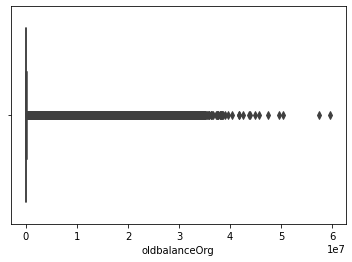

In [8]:
#Visually observing the outliers by plotting boxplot.
warnings.filterwarnings('ignore')
sns.boxplot(df['oldbalanceOrg'])
plt.show()

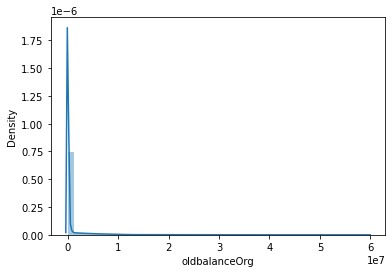

In [9]:
#Visually observing the outliers by plotting histogram.
warnings.filterwarnings('ignore')
sns.distplot(df['oldbalanceOrg'])
plt.show()

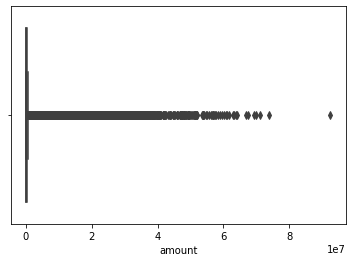

In [10]:
#Visually observing the outliers by plotting boxplot.
warnings.filterwarnings('ignore')
sns.boxplot(df['amount'])
plt.show()

In [11]:
#defining a function that takes in a column of a dataframe and remove the outliers.
def remove_outliers(col):
    global df
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)

    upper_limit = percentile75 + 1.5 * (percentile75-percentile25)
    lower_limit = percentile25 - 1.5 * ((percentile75-percentile25))

    df[df[col] > upper_limit]
    df[df[col] < lower_limit]

    df = df[df[col] < upper_limit]
    df.shape

In [12]:
#Removing the outliers for all the columns with continuous variable.
remove_outliers('amount')
remove_outliers('oldbalanceOrg')
remove_outliers('newbalanceOrig')
remove_outliers('oldbalanceDest')

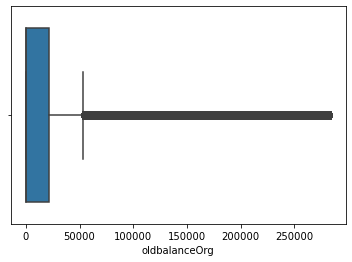

In [13]:
#Visually observing the after treating outliers by plotting boxplot.
warnings.filterwarnings('ignore')
sns.boxplot(df['oldbalanceOrg'])
plt.show()

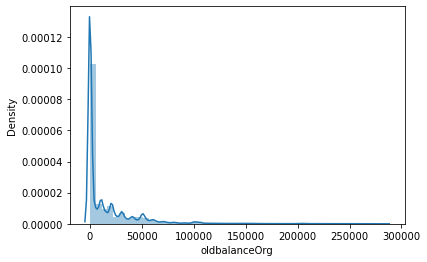

In [14]:
#Visually observing the after treating outliers by plotting histogram.
warnings.filterwarnings('ignore')
sns.distplot(df['oldbalanceOrg'])
plt.show()

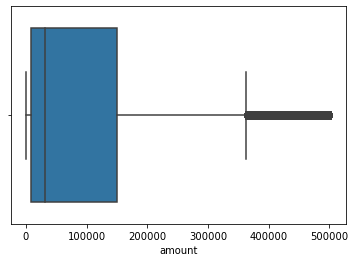

In [15]:
#Visually observing the after treating outliers by plotting boxplot.
warnings.filterwarnings('ignore')
sns.boxplot(df['amount'])
plt.show()

In [16]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0


In [17]:
#Defining a function that takes in the columns of dataframe and label encode it.
def le(col):
    l = preprocessing.LabelEncoder()
    df[col] = l.fit_transform(df[col])

In [22]:
#Label encoding for all the columns with categorical variable.
le('nameOrig')
le('type')
le('nameDest')

In [23]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1,1,3,1864.28,1205619,21249.0,19384.72,1370501,0.0,0.0,0,0
2,1,4,181.00,551735,181.0,0.00,364772,0.0,0.0,1,0
3,1,1,181.00,3211554,181.0,0.00,324893,21182.0,0.0,1,0
4,1,3,11668.14,1898928,41554.0,29885.86,672416,0.0,0.0,0,0
5,1,3,7817.71,3320803,53860.0,46042.29,1765952,0.0,0.0,0,0


In [24]:
#Defining the dependent and independent variable.
X = df.drop('isFraud', axis = 1)
y = df['isFraud']

In [27]:
#Splitting the dataset into train(90% of total) and test dataset(10% of total).
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.1)

In [30]:
#Creating the decision tree model
model = tree.DecisionTreeClassifier()
#Training the model using train dataset
model.fit(x_train, y_train)
#Testing the accuracy of the model by feeding in the test dataset.
model.score(x_test, y_test)

0.9995605110628498